In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid=pd.read_csv('Covid Data.csv')
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
covid.shape

(1048575, 21)

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [8]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [9]:
correlation=covid.corr()

<AxesSubplot:>

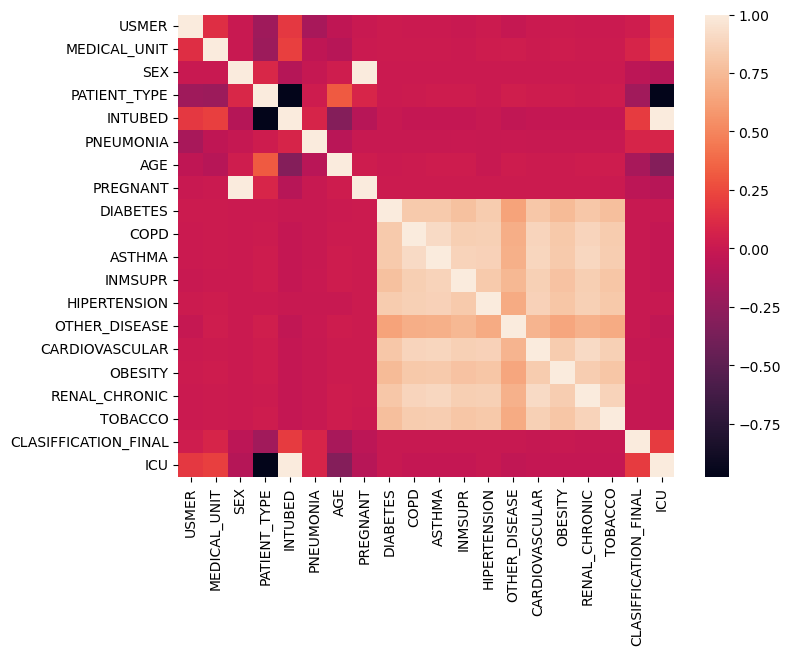

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(covid.corr())

<AxesSubplot:xlabel='PATIENT_TYPE', ylabel='count'>

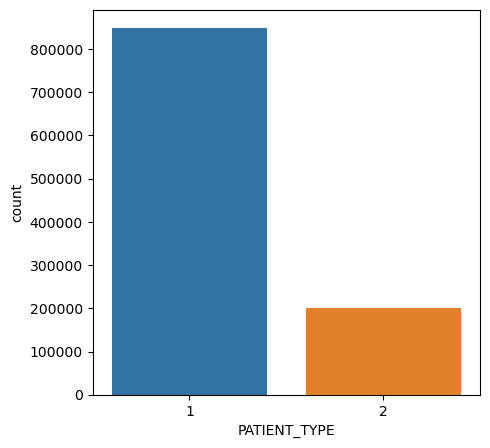

In [11]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="PATIENT_TYPE",data=covid)

<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='count'>

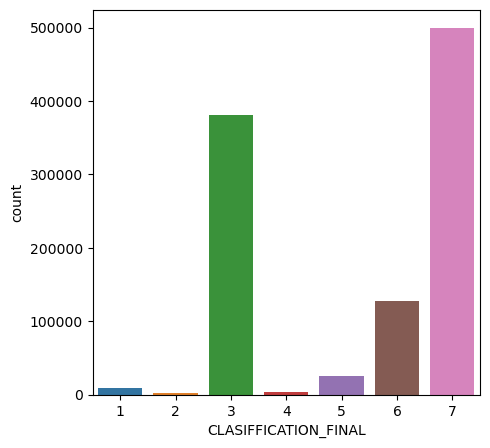

In [12]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x="CLASIFFICATION_FINAL",data=covid)

In [13]:
x=covid.drop(['DATE_DIED','CLASIFFICATION_FINAL'],axis=1)
x

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,2,2,2,2,2,2,2,2,97
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,97
1048573,2,13,2,1,97,2,28,97,2,2,2,2,2,2,2,2,2,2,97


In [14]:
y=covid['CLASIFFICATION_FINAL'].apply(lambda y:0 if y<=3 else 1)
y

0          0
1          1
2          0
3          1
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: CLASIFFICATION_FINAL, Length: 1048575, dtype: int64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [16]:
x.shape,X_train.shape,X_test.shape

((1048575, 19), (943717, 19), (104858, 19))

In [17]:
X_train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
596623,1,12,2,1,97,2,78,97,1,2,2,2,1,2,2,2,2,2,97
268403,2,4,2,1,97,2,66,97,2,2,2,2,1,1,2,2,2,2,97
545153,2,12,2,1,97,2,77,97,2,2,2,2,2,2,2,2,2,2,97
824854,1,12,2,1,97,2,30,97,2,2,2,2,2,2,2,1,2,2,97
297530,2,4,1,2,2,2,23,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,2,12,1,1,97,2,63,2,2,2,2,2,2,2,2,2,2,2,97
791624,2,12,1,1,97,2,46,2,2,2,2,2,1,2,2,1,2,2,97
470924,2,12,1,1,97,2,57,2,2,2,2,2,2,2,2,2,2,2,97
491755,2,12,2,1,97,2,30,97,2,2,2,2,2,2,2,2,2,2,97


In [18]:
tree=DecisionTreeClassifier()

In [19]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.7161341800560973
accuracy score of test data: 0.761839821472849


In [20]:
fo=RandomForestClassifier(n_estimators=100)

In [21]:
fo.fit(X_train,y_train)
X_train_pred=fo.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

fo.fit(X_test,y_test)
X_test_pred=fo.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.7161151065414738
accuracy score of test data: 0.7618302847660646


In [26]:
input_data=(2,4,2,1,97,2,66,97,2,2,2,2,1,1,2,2,2,2,97)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=tree.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
if(prediction[0]==1):
    print('No covid')
else:
    print('Have covid')

Have covid
